In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import nolds
import pywt
import emd

from glassnode import *
from statsmodels.tsa.stattools import adfuller
from stqdm import stqdm

import statsmodels.api as sm
from scipy.stats import mode
from scipy import signal

from tqdm.notebook import tqdm

plt.rcParams['figure.figsize'] = [14,7]
sns.set()

In [22]:
Addresses = ['count', 'sending_count','receiving_count', 
             'active_count','non_zero_count', 'min_1_count',
             'min_10_count', 'min_100_count','min_1k_count', 
             'min_10k_count']

Blockchain = ['utxo_created_count', 'utxo_created_value_sum',
              'utxo_spent_value_sum', 'utxo_created_value_mean',
              'utxo_created_value_median','utxo_spent_value_median', 
              'utxo_profit_count','utxo_loss_count', 
              'utxo_profit_relative','block_height', 
              'block_count','block_interval_median']

Distribution = ['exchange_net_position_change','balance_1pct_holders', 
                'gini']

Indicators = ['rhodl_ratio',
              'cvdd',
              'balanced_price_usd',
              'hash_ribbon',
              'difficulty_ribbon',
              'difficulty_ribbon_compression',
              'nvt',
              'nvts',
              'velocity',
              'nvt_entity_adjusted',
              'cdd_supply_adjusted',
              'cdd_supply_adjusted_binary',
              'average_dormancy_supply_adjusted',
              'spent_output_price_distribution_ath',
              'spent_output_price_distribution_percent',
              'puell_multiple',
              'sopr_adjusted',
              'reserve_risk',
              'sopr_less_155',
              'sopr_more_155',
              'hodler_net_position_change',
              'hodled_lost_coins',
              'cyd',
              'cyd_supply_adjusted',
              'cyd_account_based',
              'cyd_account_based_supply_adjusted',
              'cdd90_age_adjusted',
              'cdd90_account_based_age_adjusted',
              'sopr',
              'cdd',
              'asol',
              'msol',
              'average_dormancy',
              'liveliness',
              'unrealized_profit',
              'unrealized_loss',
              'net_unrealized_profit_loss',
              'nupl_less_155',
              'nupl_more_155',
              'sopr_account_based',
              'cdd_account_based',
              'asol_account_based',
              'msol_account_based',
              'dormancy_account_based',
              'dormancy_flow',
              'liveliness_account_based',
              'mvrv_account_based',
              'rcap_account_based',
              'unrealized_profit_account_based'
              'unrealized_loss_account_based',
              'net_unrealized_profit_loss_account_based',
              'nupl_less_155_account_based',
              'nupl_more_155_account_based',
              'net_realized_profit_loss',
              'realized_profit_loss_ratio',
              'stock_to_flow_ratio',
              'stock_to_flow_deflection',
              'realized_profit',
              'realized_loss',
              'ssr',
              'ssr_oscillator', 
              'utxo_realized_price_distribution_ath',
              'utxo_realized_price_distribution_percent',
              'soab',
              'sol_1h',
              'sol_1h_24h',
              'sol_1d_1w',
              'sol_1w_1m',
              'sol_1m_3m',
              'sol_3m_6m', 
              'sol_6m_12m',
              'sol_1y_2y',
              'sol_2y_3y',
              'sol_3y_5y',
              'sol_5y_7y',
              'sol_7y_10y',
              'sol_more_10y']

Market = ['price_drawdown_relative','deltacap_usd', 'marketcap_usd', 'mvrv','mvrv_z_score']

Mining = ['difficulty_latest','revenue_from_fees', 'marketcap_thermocap_ratio']

Supply = ['current', 'issued', 'inflation_rate','active_24h', 'active_1d_1w', 
          'active_1w_1m','active_1m_3m', 'active_3m_6m', 'active_6m_12m',
          'active_1y_2y', 'active_2y_3y','active_more_1y_percent',
           'active_more_3y_percent']

Transactions = ['size_mean', 'size_sum','transfers_volume_adjusted_sum',
                'transfers_volume_adjusted_median',
                'transfers_volume_from_exchanges_mean',
                'transfers_volume_exchanges_net',
                'transfers_to_exchanges_count',
                'transfers_from_exchanges_count']

Derivatives = ['futures_funding_rate_perpetual',
               'futures_funding_rate_perpetual_all',
               'futures_open_interest_cash_margin_sum',
               'futures_open_interest_crypto_margin_sum',
               'futures_open_interest_crypto_margin_relative',
               'futures_estimated_leverage_ratio',
               'futures_volume_daily_sum',
               'futures_volume_daily_perpetual_sum',
               'futures_open_interest_sum',
               'futures_open_interest_perpetual_sum',
               'futures_liquidated_volume_short_sum',
               'futures_liquidated_volume_short_mean',
               'futures_liquidated_volume_long_sum',
               'futures_liquidated_volume_long_mean',
               'futures_liquidated_volume_long_relative',
               'futures_volume_daily_sum_all',
               'futures_volume_daily_perpetual_sum_all',
               'futures_open_interest_sum_all',
               'futures_open_interest_perpetual_sum_all',
               'options_volume_daily_sum',
               'options_open_interest_sum',
               'options_open_interest_distribution',
               'futures_open_interest_latest',
               'futures_volume_daily_latest']

Institutions = ['grayscale_holdings_sum',
                'grayscale_flows_sum',
                'grayscale_premium_percent',
                'grayscale_aum_sum',
                'grayscale_market_price_usd',
                'purpose_etf_holdings_sum',
                'purpose_etf_flows_sum',
                'qbtc_holdings_sum',
                'qbtc_flows_sum',
                'qbtc_premium_percent',
                'qbtc_aum_sum',
                'qbtc_market_price_usd']

urls = []

for a in Addresses:
    urls += [URLS['Addresses']+a]

for b in Blockchain:
    urls += [URLS['Blockchain']+b]

for d in Distribution:
    urls += [URLS['Distribution']+d]

for i in Indicators:
    urls += [URLS['Indicators']+i]

for m in Mining:
    urls += [URLS['Mining']+m]

for s in Supply:
    urls += [URLS['Supply']+s]

for t in Transactions:
    urls += [URLS['Transactions']+t]

for m1 in Market:
    urls += [URLS['Market']+m1]

for m2 in Derivatives:
    urls += [URLS['Derivatives']+m2]

for m3 in Institutions:
    urls += [URLS['Institutions']+m3]    

Urls = dict()

for u in urls:
    Urls[u.split('/')[-1]] = u


In [23]:
def strided_app(a, L, S ):  # Window len = L, Stride len/stepsize = S
    nrows = ((a.size-L)//S)+1
    n = a.strides[0]
    return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S*n,n))

In [27]:
def get_glassnode_price():
    GLASSNODE_API_KEY = '1vUcyF35hTk9awbNGszF0KcLuYH'

    self = GlassnodeClient()
    self.set_api_key(GLASSNODE_API_KEY)

    url = URLS['Market'] + 'price_usd_ohlc'
    a ='BTC'
    c = 'native'
    i='24h'

    ohlc = self.get(url,a,i,c)
    return ohlc

def get_glassnode_data(list_variables,Urls):
    GLASSNODE_API_KEY = '1vUcyF35hTk9awbNGszF0KcLuYH'
    
    urls = []
    
    for i in list_variables:
        urls.append(Urls[i])
    
    self = GlassnodeClient()
    self.set_api_key(GLASSNODE_API_KEY)

    features = []

    for u in tqdm(urls):
        a,c,i='BTC','native','24h'
        z = self.get(u,a,i,c)

        try:
            features.append(z.rename(u.split('/')[-1]))
        except:
            message = f"cannot get {u.split('/')[-1]}."
            print(message)

    features = pd.concat(features,axis = 1)
    features = features.loc['2013':]
    return features

In [95]:
ohlc = get_glassnode_price()
ohlc = ohlc.rename(columns = {'c':'close','h':'high','l':'low','o':'open'})

variables = get_glassnode_data(['sopr_adjusted','rhodl_ratio','deltacap_usd'],Urls)

  0%|          | 0/3 [00:00<?, ?it/s]

In [96]:
Px = ohlc[['high','low']].mean(axis = 1).rename('price')
px = np.log(Px)

R = px.diff()

In [97]:
def Rolling_Mode(x,L):
    x_strided = strided_app(x.values,L,1)
    x_mode = np.empty_like(x.values)
    x_mode[:] = np.nan
    x_mode[(L-1):] = [mode(x_strided[j,:])[0][0] for j in (range(x_strided.shape[0]))]
    x_mode = pd.Series(x_mode,index = x.index)
    return x_mode

def Rolling_Hurst(x,L,max_lag=20):
    x_strided = strided_app(x.values,L,1)
    x_hurst = np.empty_like(x.values)
    x_hurst[:] = np.nan
    x_hurst[(L-1):] = [get_hurst_exponent(x_strided[j,:],max_lag=max_lag) for j in range(x_strided.shape[0])]
    x_hurst = pd.Series(x_hurst,index = x.index)
    return x_hurst

def Rolling_DFA(x,L):
    x_strided = strided_app(x.values,L,1)
    x_hurst = np.empty_like(x.values)
    x_hurst[:] = np.nan
    x_hurst[(L-1):] = [nolds.dfa(x_strided[j,:]) for j in tqdm(range(x_strided.shape[0]))]
    x_hurst = pd.Series(x_hurst,index = x.index)
    return x_hurst

def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [98]:
Price_roll_mode = Rolling_Mode(px,252)
Return_roll_mode = Rolling_Mode(R,252)
Price_roll_hurst = Rolling_Hurst(px,252,45)

In [99]:
imf = pd.DataFrame(emd.sift.sift(px.loc['2015'].values),index = px.loc['2015'].index)


2021-12-22 23:40:17.499 STARTED: sift
2021-12-22 23:40:17.504 COMPLETED: sift


array([<AxesSubplot:xlabel='t'>, <AxesSubplot:xlabel='t'>,
       <AxesSubplot:xlabel='t'>, <AxesSubplot:xlabel='t'>,
       <AxesSubplot:xlabel='t'>, <AxesSubplot:xlabel='t'>], dtype=object)

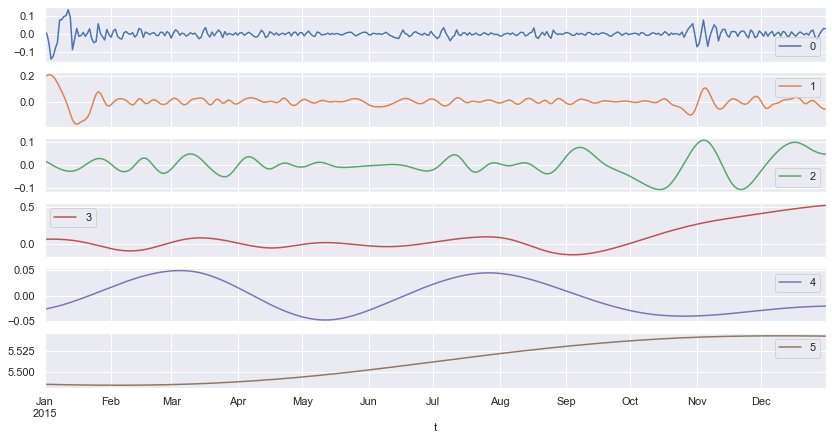

In [100]:
imf.plot(subplots = True)

<AxesSubplot:>

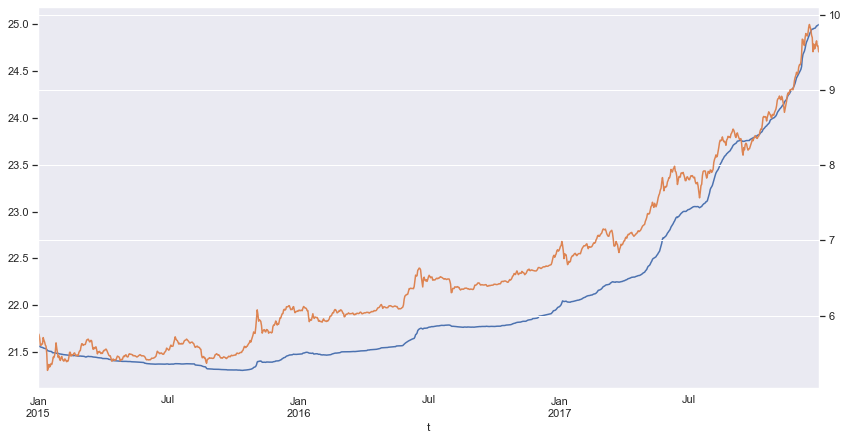

In [126]:
np.log(variables.iloc[:,-1].loc['2015':'2017']).plot()
px.loc['2015':'2017'].plot(secondary_y=True)

In [127]:
ts.coint(np.log(variables.iloc[:,-1].loc['2015':'2017']),px.loc['2015':'2017'])

(-1.3292798265053,
 0.8207256441505703,
 array([-3.9064697 , -3.34171569, -3.04832551]))

In [129]:
np.log(variables.iloc[:,-1].loc['2015':'2017'].corr(px.loc['2015':'2017'])

SyntaxError: unexpected EOF while parsing (3066556965.py, line 1)